## 一、算法介绍

主成分分析（PCA）是一种线性降维技术，旨在通过正交变换将高维数据投影到一个低维空间中，同时尽可能保留数据的主要信息。PCA通过找到数据中方差最大的方向（即主成分），将数据沿这些方向进行投影，从而实现降维。

### PCA的主要步骤包括：

1. **数据标准化**：对原始数据进行均值归一化，使得每个特征的均值为零，方差为一。
2. **计算协方差矩阵**：衡量不同特征之间的线性相关性。
3. **求解特征值和特征向量**：协方差矩阵的特征值和特征向量决定了主成分的方向和重要性。
4. **选择主成分**：根据特征值的大小选择前$k$个主成分。
5. **转换数据**：将原始数据投影到选定的主成分上，得到降维后的数据。

## 二、算法原理

### 2.1 数据标准化

假设我们有一个包含$n$个样本和$m$个特征的数据集，表示为矩阵$X \in \mathbb{R}^{n \times m}$。首先，对每个特征进行标准化处理，使其均值为零，方差为一：

$$
X_{norm} = \frac{X - \mu}{\sigma}
$$

其中，$\mu$是每个特征的均值，$\sigma$是标准差。

### 2.2 计算协方差矩阵

协方差矩阵$C$用于描述不同特征之间的线性相关性：

$$
C = \frac{1}{n-1} X_{norm}^T X_{norm}
$$

### 2.3 求解特征值和特征向量

通过对协方差矩阵$C$进行特征值分解，得到特征值$\lambda_i$和对应的特征向量$v_i$。特征值反映了对应特征向量所代表的主成分的重要性。

### 2.4 选择主成分

选择前$k$个最大的特征值对应的特征向量，构成投影矩阵$W$：

$$
W = [v_1, v_2, \dots, v_k]
$$

### 2.5 转换数据

将原始数据投影到选定的主成分上，得到降维后的数据$Y$：

$$
Y = X_{norm} W
$$

## 三、案例分析

为了更好地理解PCA的应用，我们将使用**Wine（葡萄酒）数据集**进行案例分析。Wine数据集包含178个样本，每个样本有13个特征，如酒精含量、苹果酸含量、灰分含量等。由于特征数量较多，我们将通过累计方差贡献度来确定合适的降维维数，并最终进行可视化展示。

协方差矩阵：
 [[ 1.00564972  0.09493026  0.21273976 -0.31198788  0.27232816  0.29073446
   0.23815287 -0.15681042  0.13747022  0.549451   -0.07215255  0.07275191
   0.64735687]
 [ 0.09493026  1.00564972  0.16497228  0.29013035 -0.05488343 -0.3370606
  -0.41332866  0.29463237 -0.22199334  0.25039204 -0.56446685 -0.37079354
  -0.19309537]
 [ 0.21273976  0.16497228  1.00564972  0.44587209  0.28820583  0.12970824
   0.11572743  0.1872826   0.00970647  0.2603499  -0.07508874  0.00393333
   0.22488969]
 [-0.31198788  0.29013035  0.44587209  1.00564972 -0.0838039  -0.32292752
  -0.353355    0.36396647 -0.19844168  0.01883781 -0.27550299 -0.27833221
  -0.44308618]
 [ 0.27232816 -0.05488343  0.28820583 -0.0838039   1.00564972  0.21561254
   0.19688989 -0.25774204  0.23777643  0.20107967  0.05571118  0.06637684
   0.39557317]
 [ 0.29073446 -0.3370606   0.12970824 -0.32292752  0.21561254  1.00564972
   0.86944804 -0.45247731  0.61587304 -0.05544792  0.43613151  0.70390388
   0.50092909]
 [ 0.23815287 -

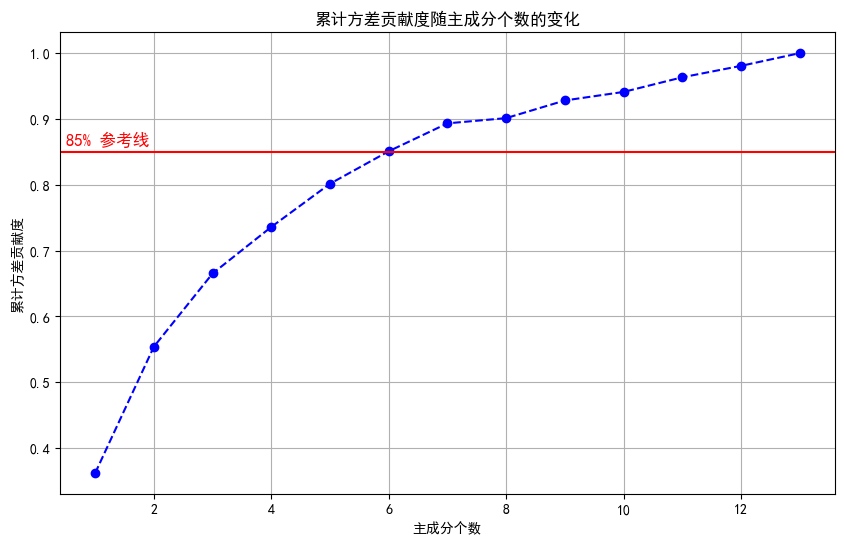

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 设置中文字体和解决负号显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体字体显示中文
plt.rcParams['axes.unicode_minus'] = False    # 解决坐标轴负号显示问题

# 1. 加载数据
wine = datasets.load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names
target_names = wine.target_names

# 2. 数据标准化
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# 3. 计算协方差矩阵
cov_matrix = np.cov(X_std.T)
print("协方差矩阵：\n", cov_matrix)

# 4. 特征值分解
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print("特征值：\n", eig_vals)
print("特征向量：\n", eig_vecs)


# 5. 计算累计方差贡献度
explained_variances = eig_vals / np.sum(eig_vals)
cumulative_explained_variances = np.cumsum(explained_variances)

# 绘制累计方差贡献度曲线
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variances)+1), cumulative_explained_variances, marker='o', linestyle='--', color='b')
plt.xlabel('主成分个数')
plt.ylabel('累计方差贡献度')
plt.title('累计方差贡献度随主成分个数的变化')
plt.grid(True)
plt.axhline(y=0.85, color='r', linestyle='-')  # 设定85%的参考线
plt.text(0.5, 0.86, '85% 参考线', color = 'red', fontsize=12)
plt.show()



投影矩阵 W（前6个主成分）：
 [[-0.1443294  -0.48365155  0.20738262 -0.0178563   0.26566365 -0.21353865]
 [ 0.24518758 -0.22493093 -0.08901289  0.53689028 -0.03521363 -0.53681385]
 [ 0.00205106 -0.31606881 -0.6262239  -0.21417556  0.14302547 -0.15447466]
 [ 0.23932041  0.0105905  -0.61208035  0.06085941 -0.06610294  0.10082451]
 [-0.14199204 -0.299634   -0.13075693 -0.35179658 -0.72704851 -0.03814394]
 [-0.39466085 -0.06503951 -0.14617896  0.19806835  0.14931841  0.0841223 ]
 [-0.4229343   0.00335981 -0.1506819   0.15229479  0.10902584  0.01892002]
 [ 0.2985331  -0.02877949 -0.17036816 -0.20330102  0.50070298  0.25859401]
 [-0.31342949 -0.03930172 -0.14945431  0.39905653 -0.13685982  0.53379539]
 [ 0.0886167  -0.52999567  0.13730621  0.06592568  0.07643678  0.41864414]
 [-0.29671456  0.27923515 -0.08522192 -0.42777141  0.17361452 -0.10598274]
 [-0.37616741  0.16449619 -0.16600459  0.18412074  0.10116099 -0.26585107]
 [-0.28675223 -0.36490283  0.12674592 -0.23207086  0.1578688  -0.11972557]]
降维后的数据（

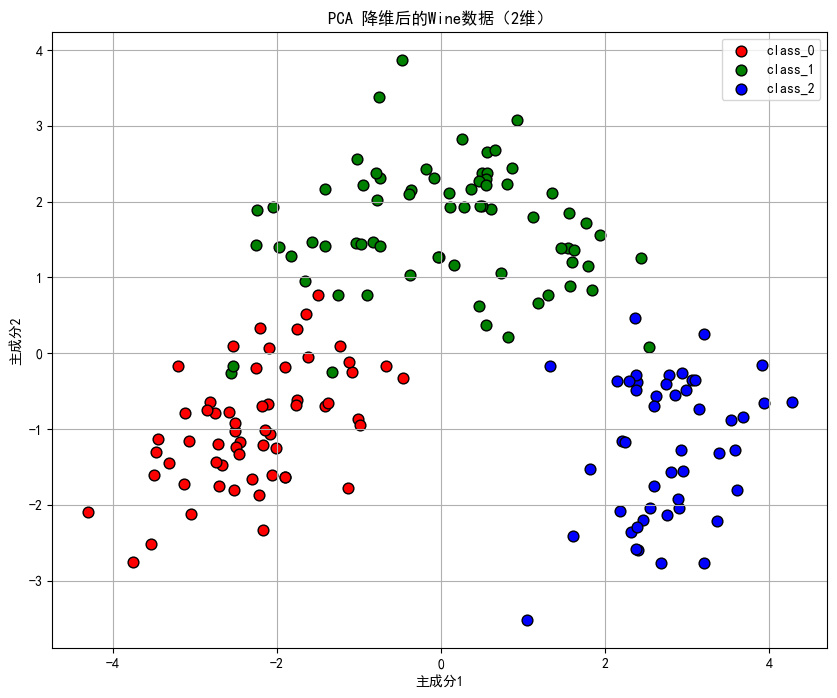

In [2]:
# 6. 根据累计方差贡献图选择前6个主成分
k = 6
sorted_indices = np.argsort(eig_vals)[::-1]
topk_indices = sorted_indices[:k]
W = eig_vecs[:, topk_indices]
print(f"投影矩阵 W（前{k}个主成分）：\n", W)

# 7. 转换数据
Y = X_std.dot(W)
print("降维后的数据（前6个样本）：\n", Y[:6])

# 8. 可视化（选择前2个主成分）
W_2d = eig_vecs[:, sorted_indices[:2]]
Y_2d = X_std.dot(W_2d)

plt.figure(figsize=(10, 8))
for target, color, label in zip([0,1,2], ['r', 'g', 'b'], target_names):
    plt.scatter(Y_2d[y == target, 0], Y_2d[y == target, 1], 
                c=color, label=label, edgecolor='k', s=60)
plt.xlabel('主成分1')
plt.ylabel('主成分2')
plt.title('PCA 降维后的Wine数据（2维）')
plt.legend()
plt.grid(True)
plt.show()



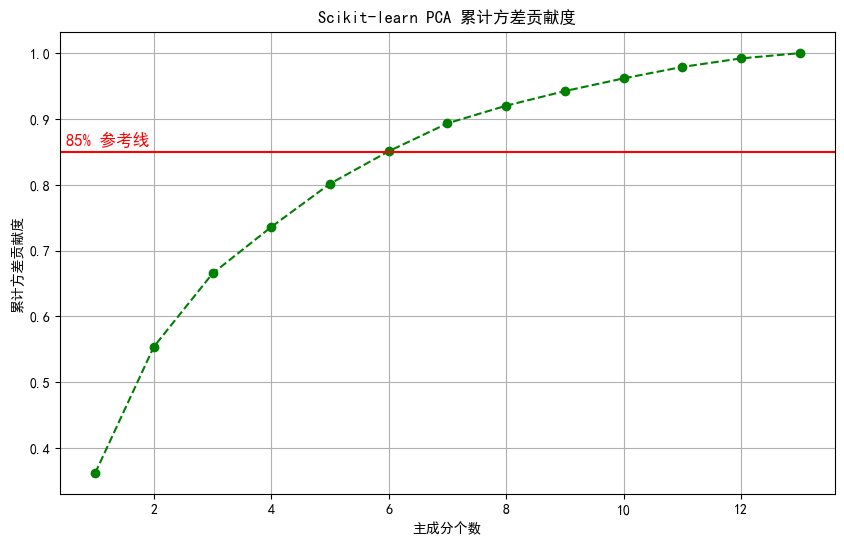

scikit-learn降维后的数据（前6个主成分，前6个样本）：
 [[ 3.31675081  1.44346263 -0.16573904 -0.21563119  0.69304284  0.22388013]
 [ 2.20946492 -0.33339289 -2.02645737 -0.29135832 -0.25765463  0.92712024]
 [ 2.51674015  1.0311513   0.98281867  0.72490231 -0.25103312 -0.54927605]
 [ 3.75706561  2.75637191 -0.17619184  0.56798331 -0.31184159 -0.114431  ]
 [ 1.00890849  0.86983082  2.02668822 -0.40976579  0.2984575   0.4065196 ]]


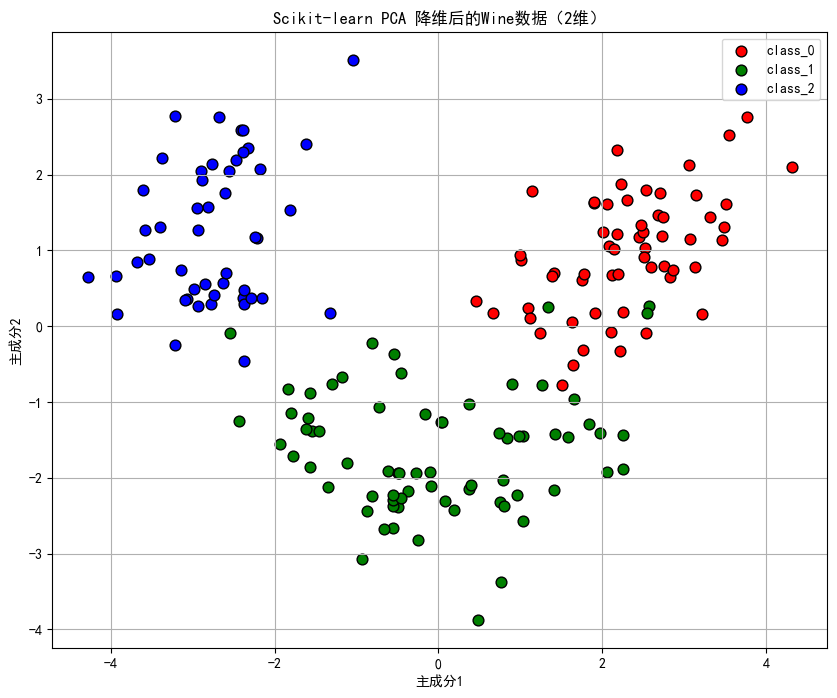

In [3]:
# 9. 使用Scikit-learn的PCA
pca = PCA(n_components=13)  # 保留所有主成分以计算累计方差
pca.fit(X_std)
cumulative_explained_variances_sklearn = np.cumsum(pca.explained_variance_ratio_)

# 绘制累计方差贡献度曲线
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variances_sklearn)+1), cumulative_explained_variances_sklearn, marker='o', linestyle='--', color='g')
plt.xlabel('主成分个数')
plt.ylabel('累计方差贡献度')
plt.title('Scikit-learn PCA 累计方差贡献度')
plt.grid(True)
plt.axhline(y=0.85, color='r', linestyle='-')  # 设定85%的参考线
plt.text(0.5, 0.86, '85% 参考线', color = 'red', fontsize=12)
plt.show()

# 选择前6个主成分
pca = PCA(n_components=6)
Y_sklearn = pca.fit_transform(X_std)
print("scikit-learn降维后的数据（前6个主成分，前6个样本）：\n", Y_sklearn[:5])

# 使用前两个主成分进行可视化
pca_2d = PCA(n_components=2)
Y_sklearn_2d = pca_2d.fit_transform(X_std)

# 可视化
plt.figure(figsize=(10, 8))
for target, color, label in zip([0,1,2], ['r', 'g', 'b'], target_names):
    plt.scatter(Y_sklearn_2d[y == target, 0], Y_sklearn_2d[y == target, 1], 
                c=color, label=label, edgecolor='k', s=60)
plt.xlabel('主成分1')
plt.ylabel('主成分2')
plt.title('Scikit-learn PCA 降维后的Wine数据（2维）')
plt.legend()
plt.grid(True)
plt.show()
